### Pair I 
# EDA 

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Set2", 20)

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------
pd.options.display.max_columns = None

Para los ejercicios de pair programming de Regresión logística tendremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremos a lo largo de los siguientes ejercicios.
Se ruega a la hora de realizar la entrega que incluyáis el conjunto de datos que hayais decidido emplear para estos ejercicios.
Objetivos:
- Buscar un conjunto de datos a analizar
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.
- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado
- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.
- Interpretación de los resultados.

In [2]:
df = pd.read_csv("../data/Invistico_Airline.csv")
df.sample(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
107899,satisfied,Female,Loyal Customer,59,Business travel,Business,661,3,3,3,3,3,5,5,4,4,4,4,4,4,3,1,0.0
78586,dissatisfied,Female,Loyal Customer,22,Business travel,Eco,1311,3,2,3,2,3,3,1,3,3,2,1,3,1,3,0,0.0


Estos datos los proporciona una organización aérea. El nombre real de la empresa no se proporciona debido a diversos fines, de ahí el nombre de Invistico Airlines.
El conjunto de datos consta de los detalles de los clientes que ya volaron con ellos. Se han consolidado los comentarios de los clientes sobre diversos contextos y sus datos de vuelo.
El objetivo principal de este conjunto de datos es predecir si un futuro cliente estaría satisfecho con su servicio dados los detalles de los valores de otros parámetros.
Además, las aerolíneas necesitan saber en qué aspectos de los servicios que ofrecen deben enfatizarse más para generar clientes más satisfechos.

Nuestra variable respuesta es "satisfaction" para saber si el cliente está satisfecho o no. Las variables predictoras son:    

* Gender: Indica el género del cliente, en los ejemplos proporcionados, tenemos "Female" y "Male".

* Customer Type: Describe el tipo de cliente, en este caso, "disloyal Customer" (cliente desleal).

* Age: Representa la edad del cliente. En los ejemplos, los clientes tienen edades de 39 y 43 años.

* Type of Travel: Indica el propósito del viaje, en este caso, "Business travel" (viaje de negocios).

* Class: Representa la clase del vuelo, que en este caso es "Business" (clase de negocios).

* Flight Distance: La distancia del vuelo en kilómetros.

* Seat comfort: Una calificación para la comodidad del asiento, en una escala numérica (en los ejemplos, 3).

* Departure/Arrival time convenient: Una calificación para la conveniencia de los horarios de salida/llegada.

* Food and drink: Una calificación para la comida y bebida a bordo.

* Online support: Calificación para el soporte en línea.

* Ease of Online booking: Calificación para la facilidad de reserva en línea.

* On-board service: Calificación para el servicio a bordo.

* Leg room service: Calificación para el espacio para las piernas.

* Baggage handling: Calificación para el manejo del equipaje.

* Checkin service: Calificación para el servicio de check-in.

* Cleanliness: Calificación para la limpieza.

* Online boarding: Calificación para el proceso de embarque en línea.

* Departure Delay in Minutes: El retraso en minutos en la salida del vuelo.

* Arrival Delay in Minutes: El retraso en minutos en la llegada del vuelo.

In [3]:
df.shape

(129880, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [6]:
df.describe(include="object").T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


In [7]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
nulos_comment = round(df["Arrival Delay in Minutes"].isnull().sum() / df.shape[0], 3)
print(f"El porcentaje de nulos para la columna embarked es de : {nulos_comment}")

El porcentaje de nulos para la columna embarked es de : 0.003


In [9]:
df["Arrival Delay in Minutes"].replace(np.nan, df["Arrival Delay in Minutes"].median(), inplace = True)

In [10]:
df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [11]:
columnas_categoria = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]

for i in columnas_categoria:
    df[i] = df[i].astype("category")

In [12]:
df.dtypes

satisfaction                         category
Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Seat comfort                            int64
Departure/Arrival time convenient       int64
Food and drink                          int64
Gate location                           int64
Inflight wifi service                   int64
Inflight entertainment                  int64
Online support                          int64
Ease of Online booking                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Cleanliness                             int64
Online boarding                         int64
Departure Delay in Minutes        

```Gestión de columnas```

In [13]:
df.rename(columns = {"satisfaction": "satisfaccion", 
                     "Gender": "genero",
                     "Customer Type": "cliente",
                     "Age": "edad", 
                     "Type of Travel": "viaje",
                     "Class": "clase",
                     "Flight Distance": "distancia", 
                     "Seat comfort": "asiento", 
                     "Departure/Arrival time convenient": "puntualidad", 
                     "Food and drink": "comida_bebida", 
                     "Gate location": "puerta_embarque",
                     "Inflight wifi service": "wifi",
                     "Inflight entertainment": "entretenimiento",
                     "Online support": "asistencia_linea",
                     "Ease of Online booking": "reserva_linea",
                     "On-board service": "serv_a_bordo",
                     "Leg room service":"serv_habitaciones",
                     "Baggage handling": "gestion_equipaje",
                     "Checkin service":"checkin",
                     "Cleanliness": "limpieza",
                     "Online boarding": "embarque_linea",
                     "Departure Delay in Minutes": "retraso_salida",
                     "Arrival Delay in Minutes": "retraso_llegada"
                         }, inplace = True)

In [14]:
df.head(1)

,satisfaccion,genero,cliente,edad,viaje,clase,distancia,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,retraso_salida,retraso_llegada
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


```Visualización de variables predictoras y respuesta```

Distribución variable respuesta

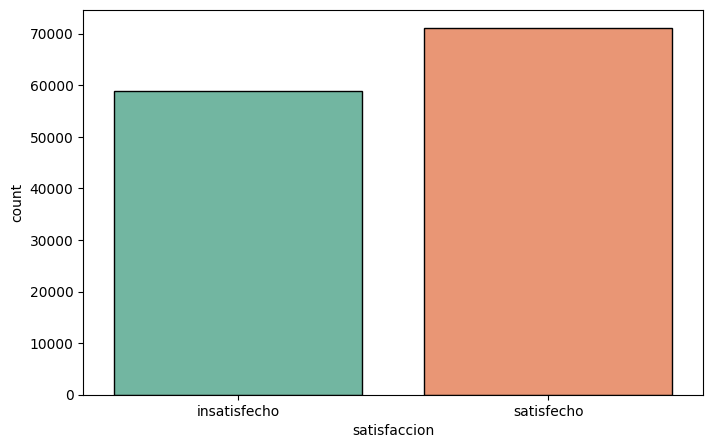

''

In [15]:
plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df, x = "satisfaccion",  palette= qualitative_colors,  edgecolor='black')
fig1.set(xticklabels=["insatisfecho", "satisfecho"]) 
plt.savefig("../graficas/01_eda_vr.png")
plt.show()
;

In [16]:
df["satisfaccion"].value_counts() / df.shape[0]

satisfaccion
satisfied       0.547328
dissatisfied    0.452672
Name: count, dtype: float64

El 54% de los clientes están satisfechos con la aerolínea, mientras que el 45% no lo están.

Variables categóricas

In [17]:
dicc_satisfaccion = {'dissatisfied': 'insatisfecho', 'satisfied': 'satisfecho'}
# Aplicar el mapeo a la variable
df['satisfaccion'] = df['satisfaccion'].map(dicc_satisfaccion)

In [18]:
dicc_genero= {'Female': 'mujer', 'Male': 'hombre'}
df['genero'] = df['genero'].map(dicc_genero)

In [19]:
dicc_customer = {'disloyal Customer': 'cliente desleal', 'Loyal Customer': 'cliente leal'}
df['cliente'] = df['cliente'].map(dicc_customer)

In [20]:
dicc_viaje = {'Business travel': 'viaje de negocios', 'Personal Travel': 'viaje personal'}
df['viaje'] = df['viaje'].map(dicc_viaje)

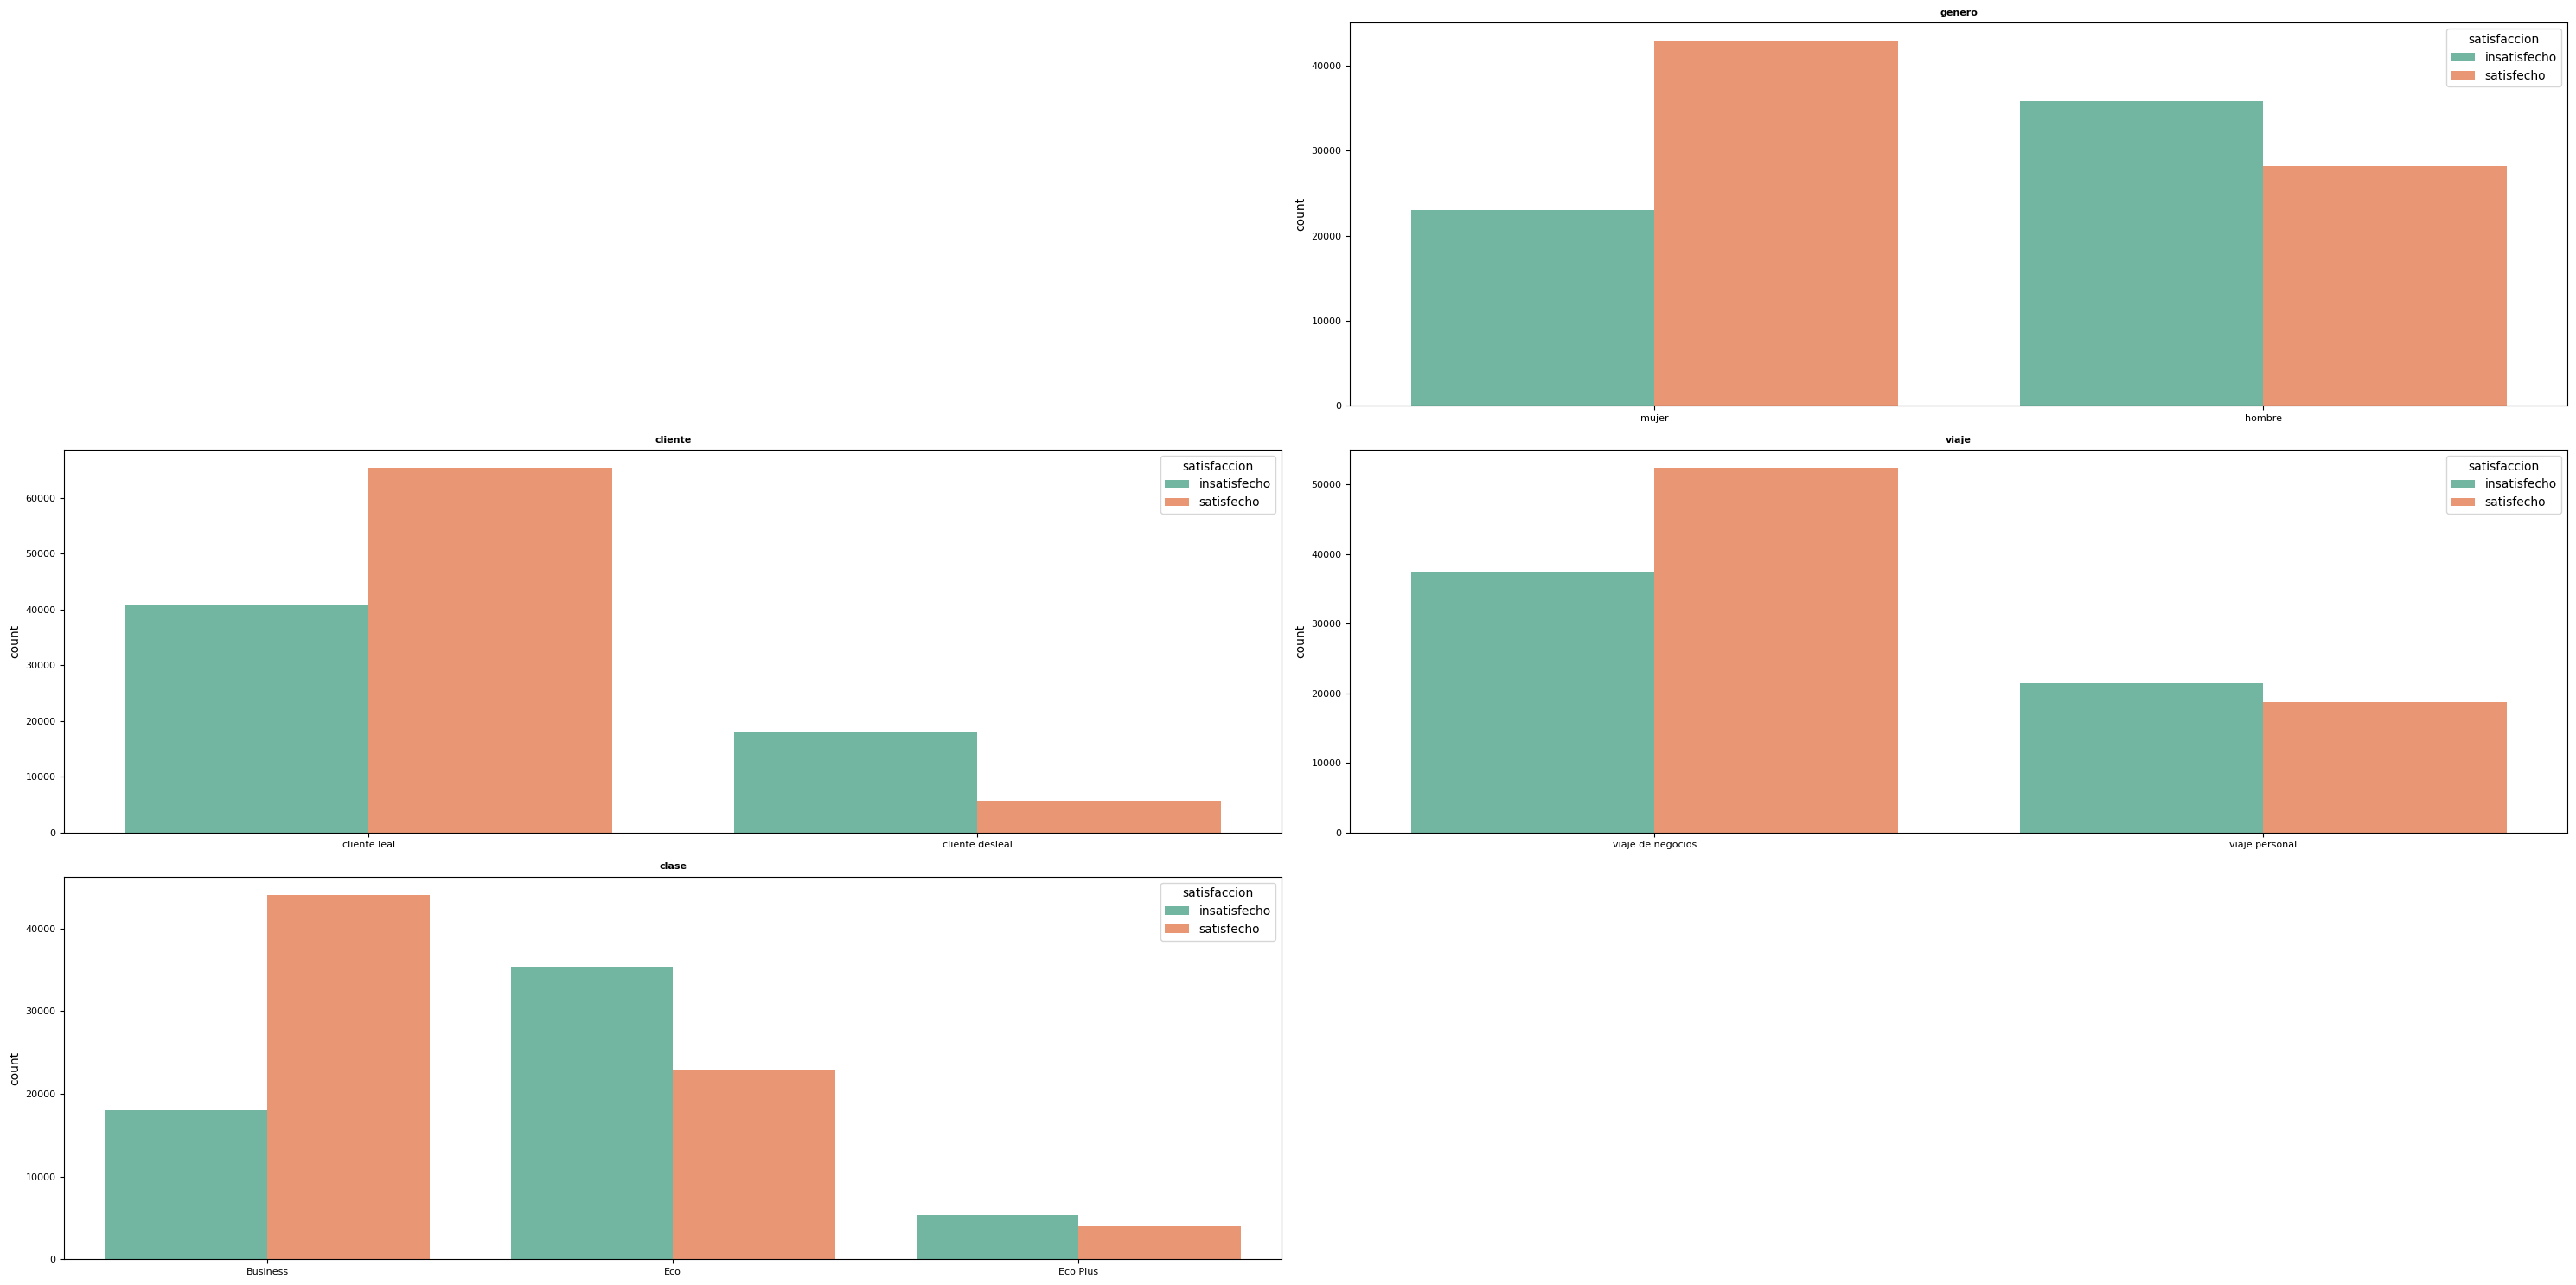

In [21]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 15))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "category").columns


for i, colum in enumerate(columnas_cat, start = 1): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaccion",
        ax=axes[i - 1],
        palette= qualitative_colors)
    
    
    axes[i -1].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i -1].tick_params(labelsize = 8)
    axes[i- 1].set_xlabel("")
   

fig.tight_layout()
fig.delaxes(axes[0])
fig.delaxes(axes[-1])
plt.savefig("../graficas/01_eda_countplots_distribucion_cat.png");

Variables numéricas (y falsas numéricas)

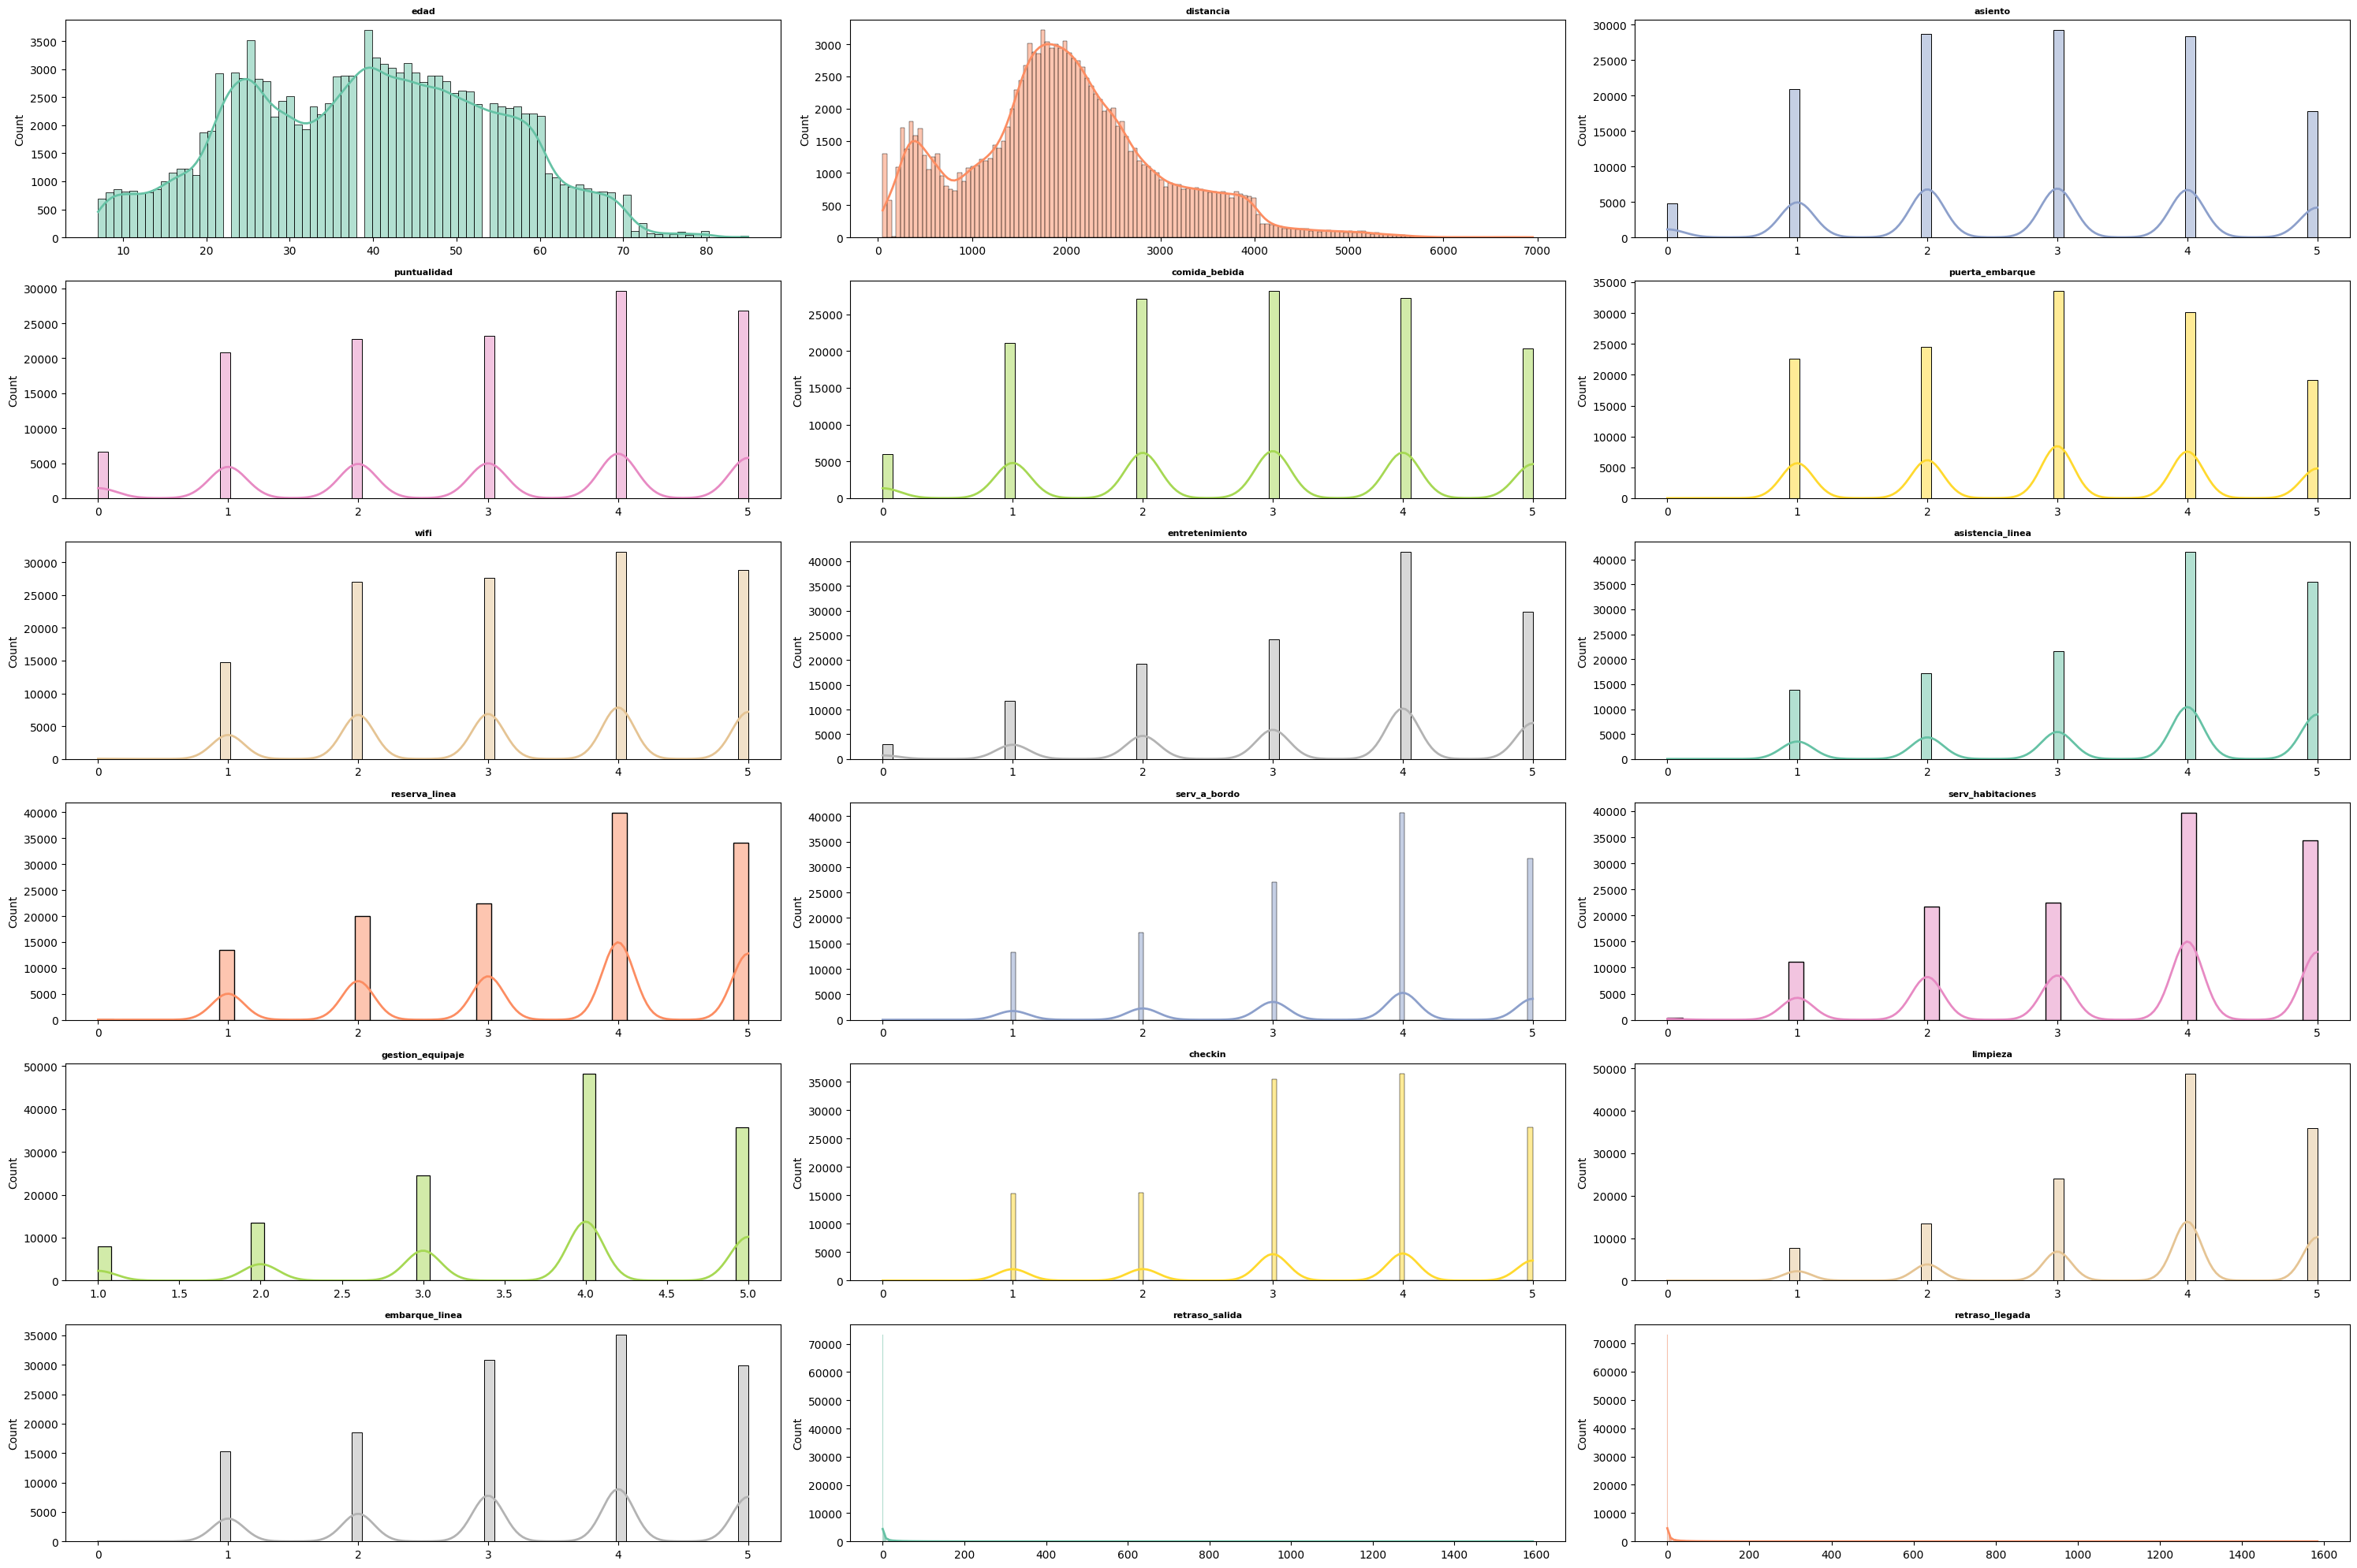

In [22]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (30, 20))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = qualitative_colors[i], 
        line_kws = {"linewidth": 2}, 
        #alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.savefig("../graficas/01_eda_histplots_distribucion_num.png");


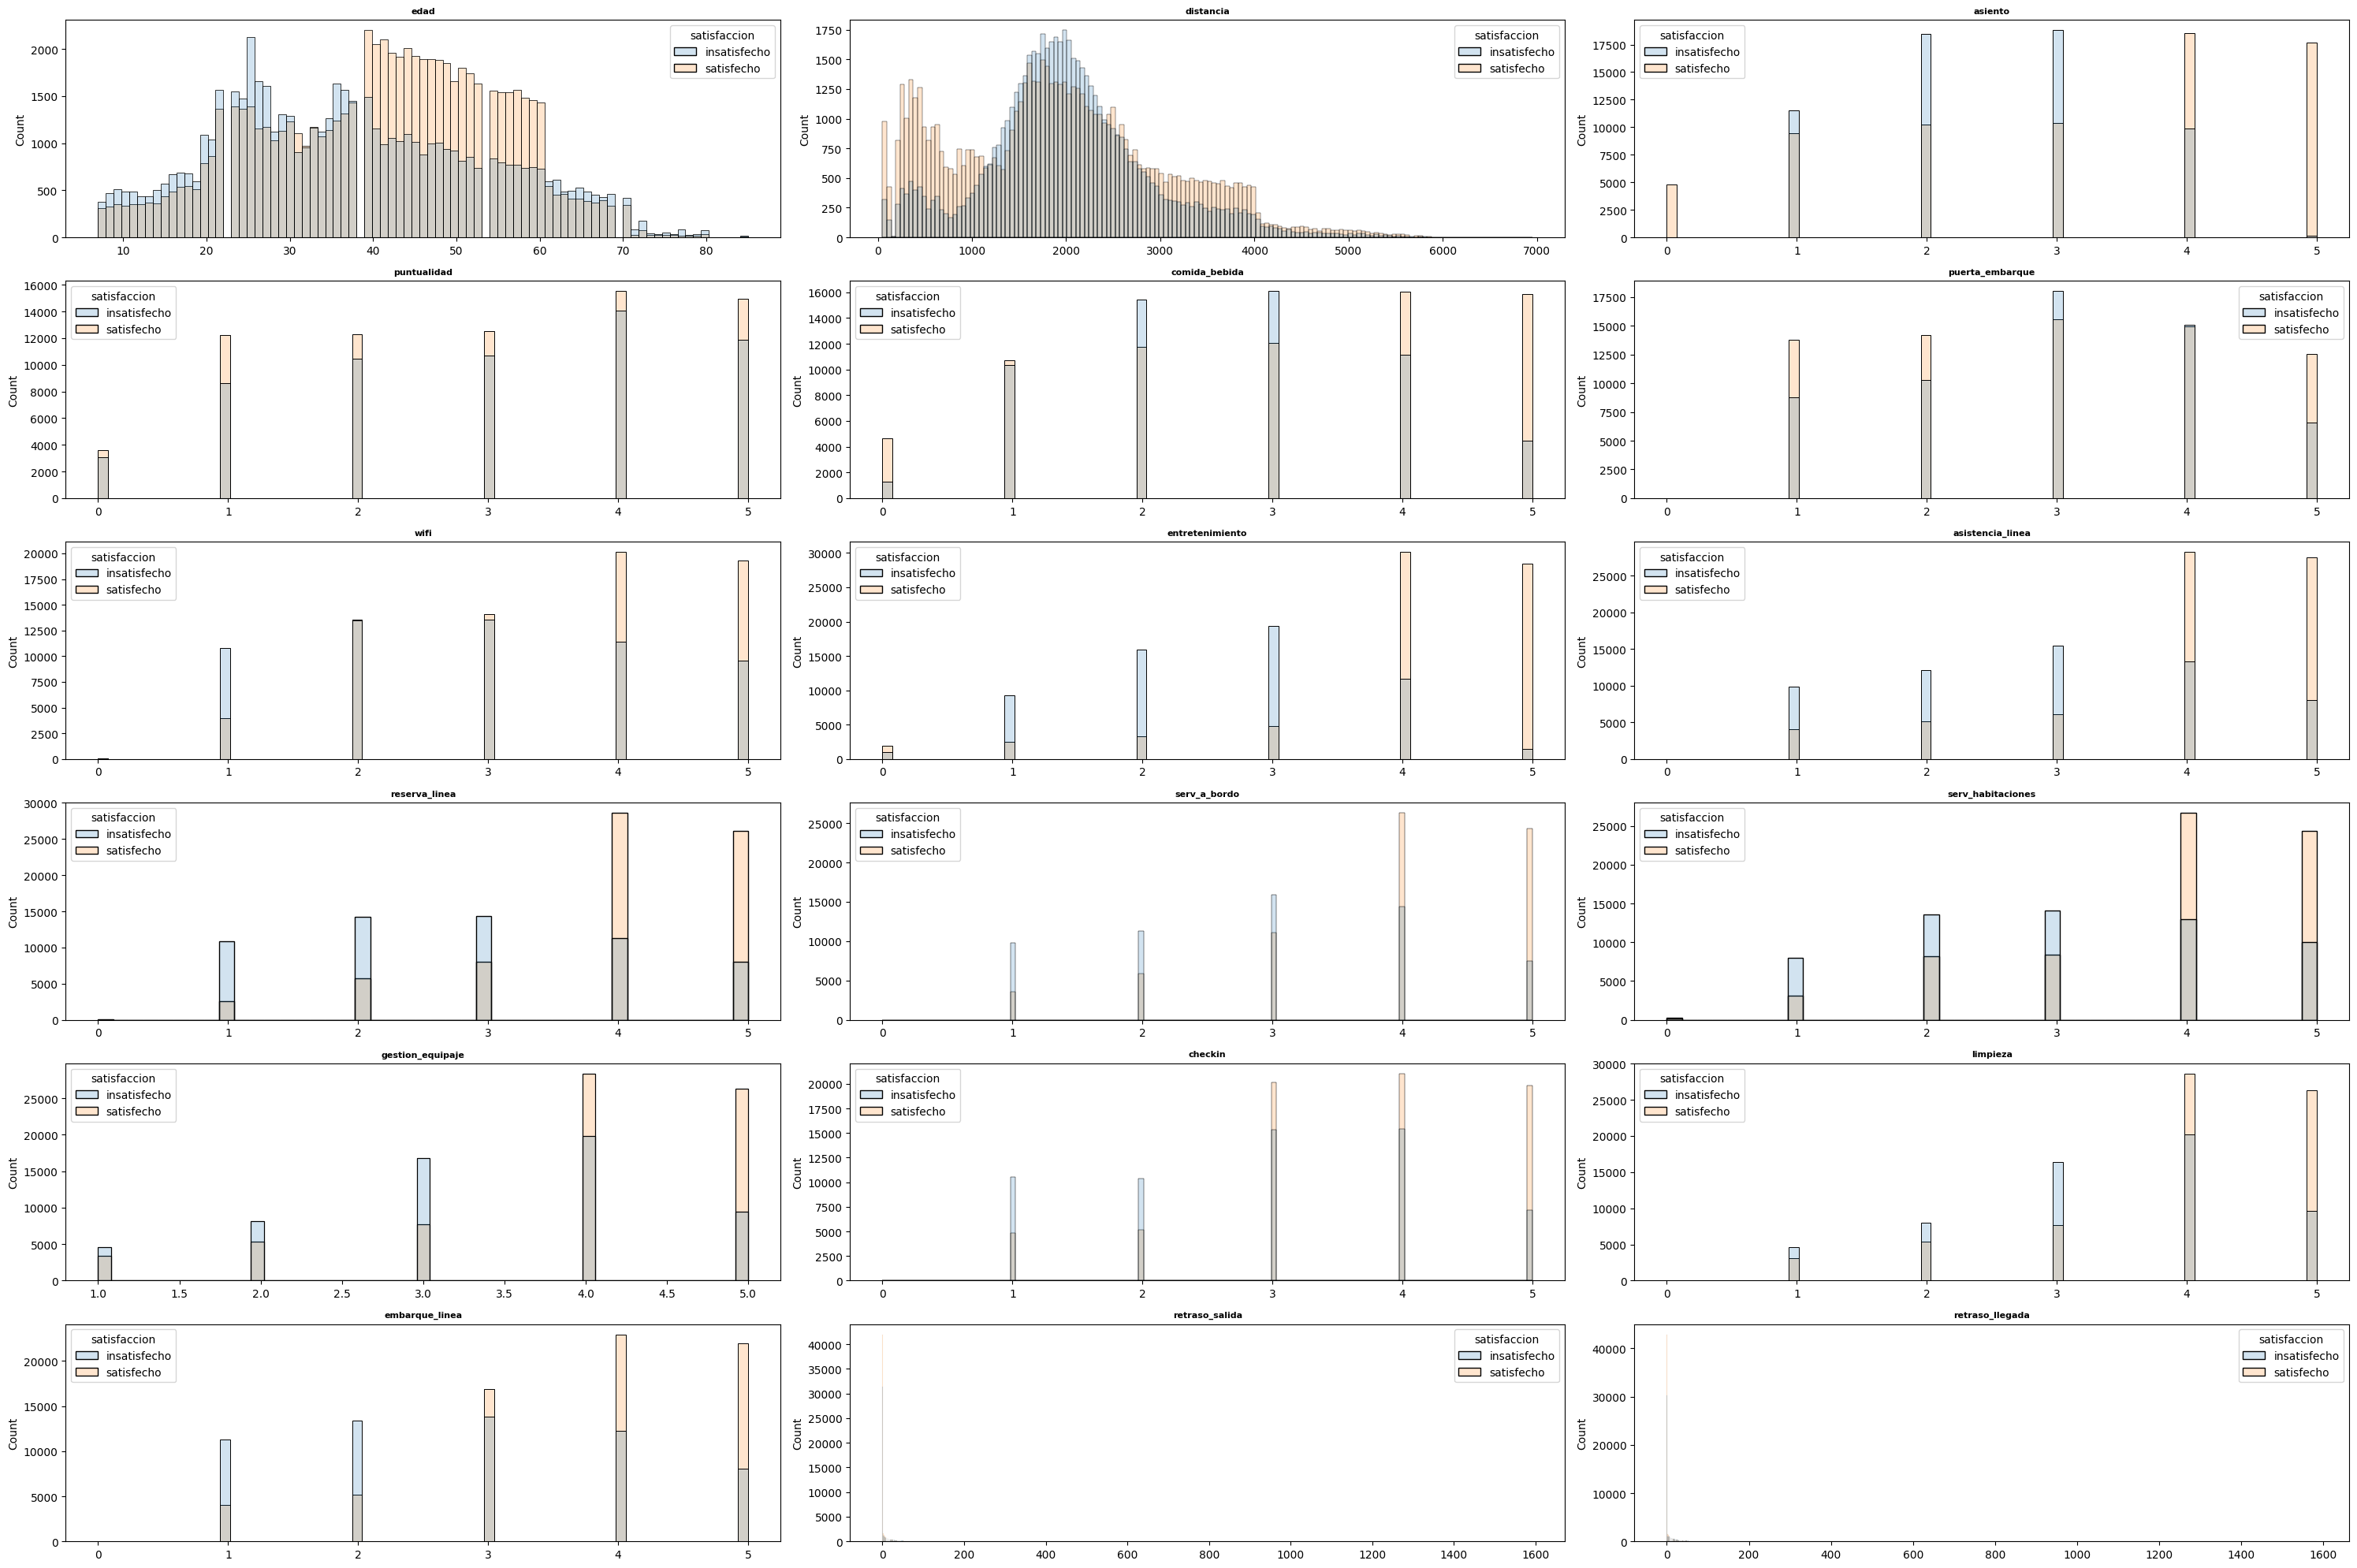

In [23]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (30, 20))


axes = axes.flat

numericas = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(numericas): 
    sns.histplot(
        data = df,
        x = colum,
        hue = "satisfaccion", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.savefig("../graficas/01_eda_histplots_vr_cat.png");

Gráfico de correlación

In [24]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.head(2)

,edad,distancia,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,retraso_salida,retraso_llegada
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0


In [25]:
# creamos la matriz de correlación
correlacion = df_numericas.corr()
correlacion

,edad,distancia,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,retraso_salida,retraso_llegada
edad,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011206
distancia,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.109733
asiento,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025463
puntualidad,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002500
comida_bebida,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014845
puerta_embarque,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003620
wifi,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035198
entretenimiento,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033182
asistencia_linea,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.035940
reserva_linea,0.071594,-0.022299,0.211531,0.001755,0.041189,0.001442,0.601100,0.321731,0.617489,1.000000,0.436264,0.355122,0.398322,0.137744,0.417675,0.684320,-0.036545,-0.039717


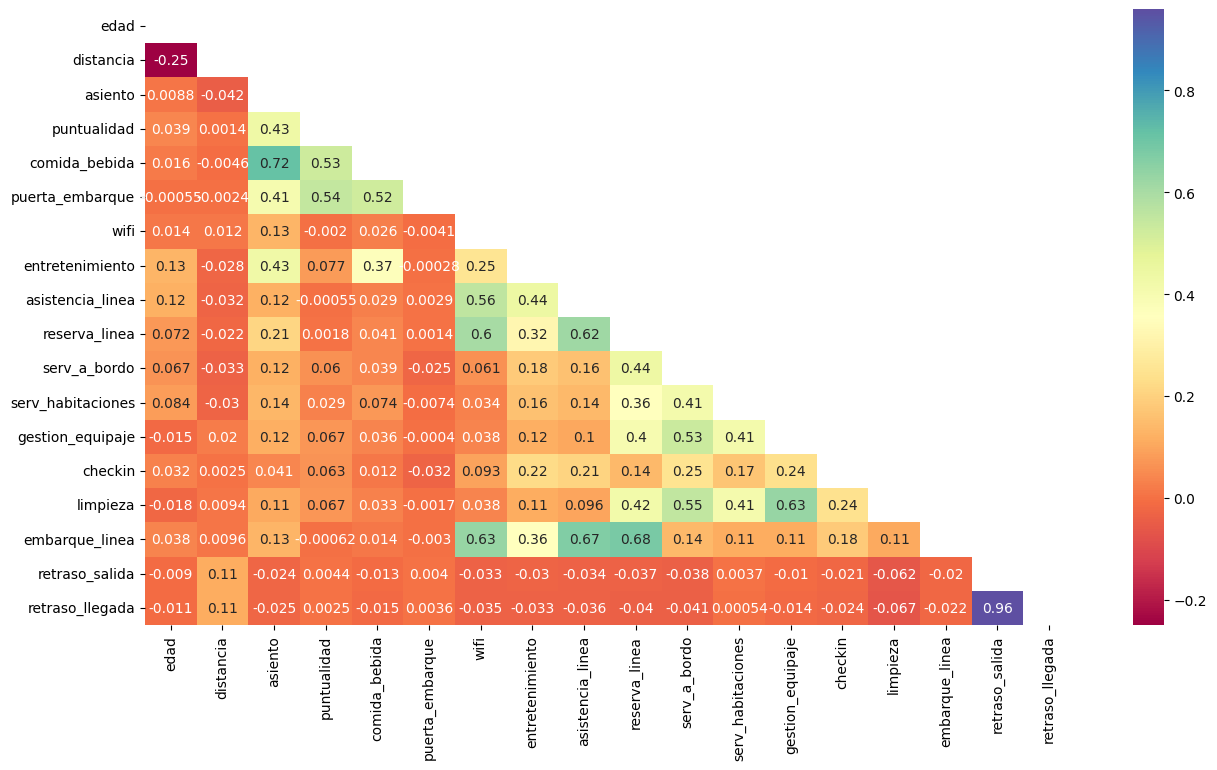

In [26]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap= "Spectral", annot = True, mask = mask)
plt.savefig("../graficas/01_eda_heatmap.png"); 

Las variables retraso_salida y retraso_llegada tienen una correlación de 0.96, nos dan la misma información, por lo que valoramos eliminar retraso_llegada que originalmente tenía nulos.
Suponemos que esta correlación se debe a que si hay retrasos en los vuelos de salida lógicamente los habrá en la llegada, por lo que nos aporta información adicional. 

In [27]:
df.drop("retraso_llegada", axis = 1, inplace= True)

In [28]:
df_numericas.drop("retraso_llegada", axis = 1, inplace= True)


Preprocesamiento

In [29]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['edad', 'distancia', 'asiento', 'puntualidad', 'comida_bebida',
       'puerta_embarque', 'wifi', 'entretenimiento', 'asistencia_linea',
       'reserva_linea', 'serv_a_bordo', 'serv_habitaciones',
       'gestion_equipaje', 'checkin', 'limpieza', 'embarque_linea',
       'retraso_salida'],
      dtype='object')

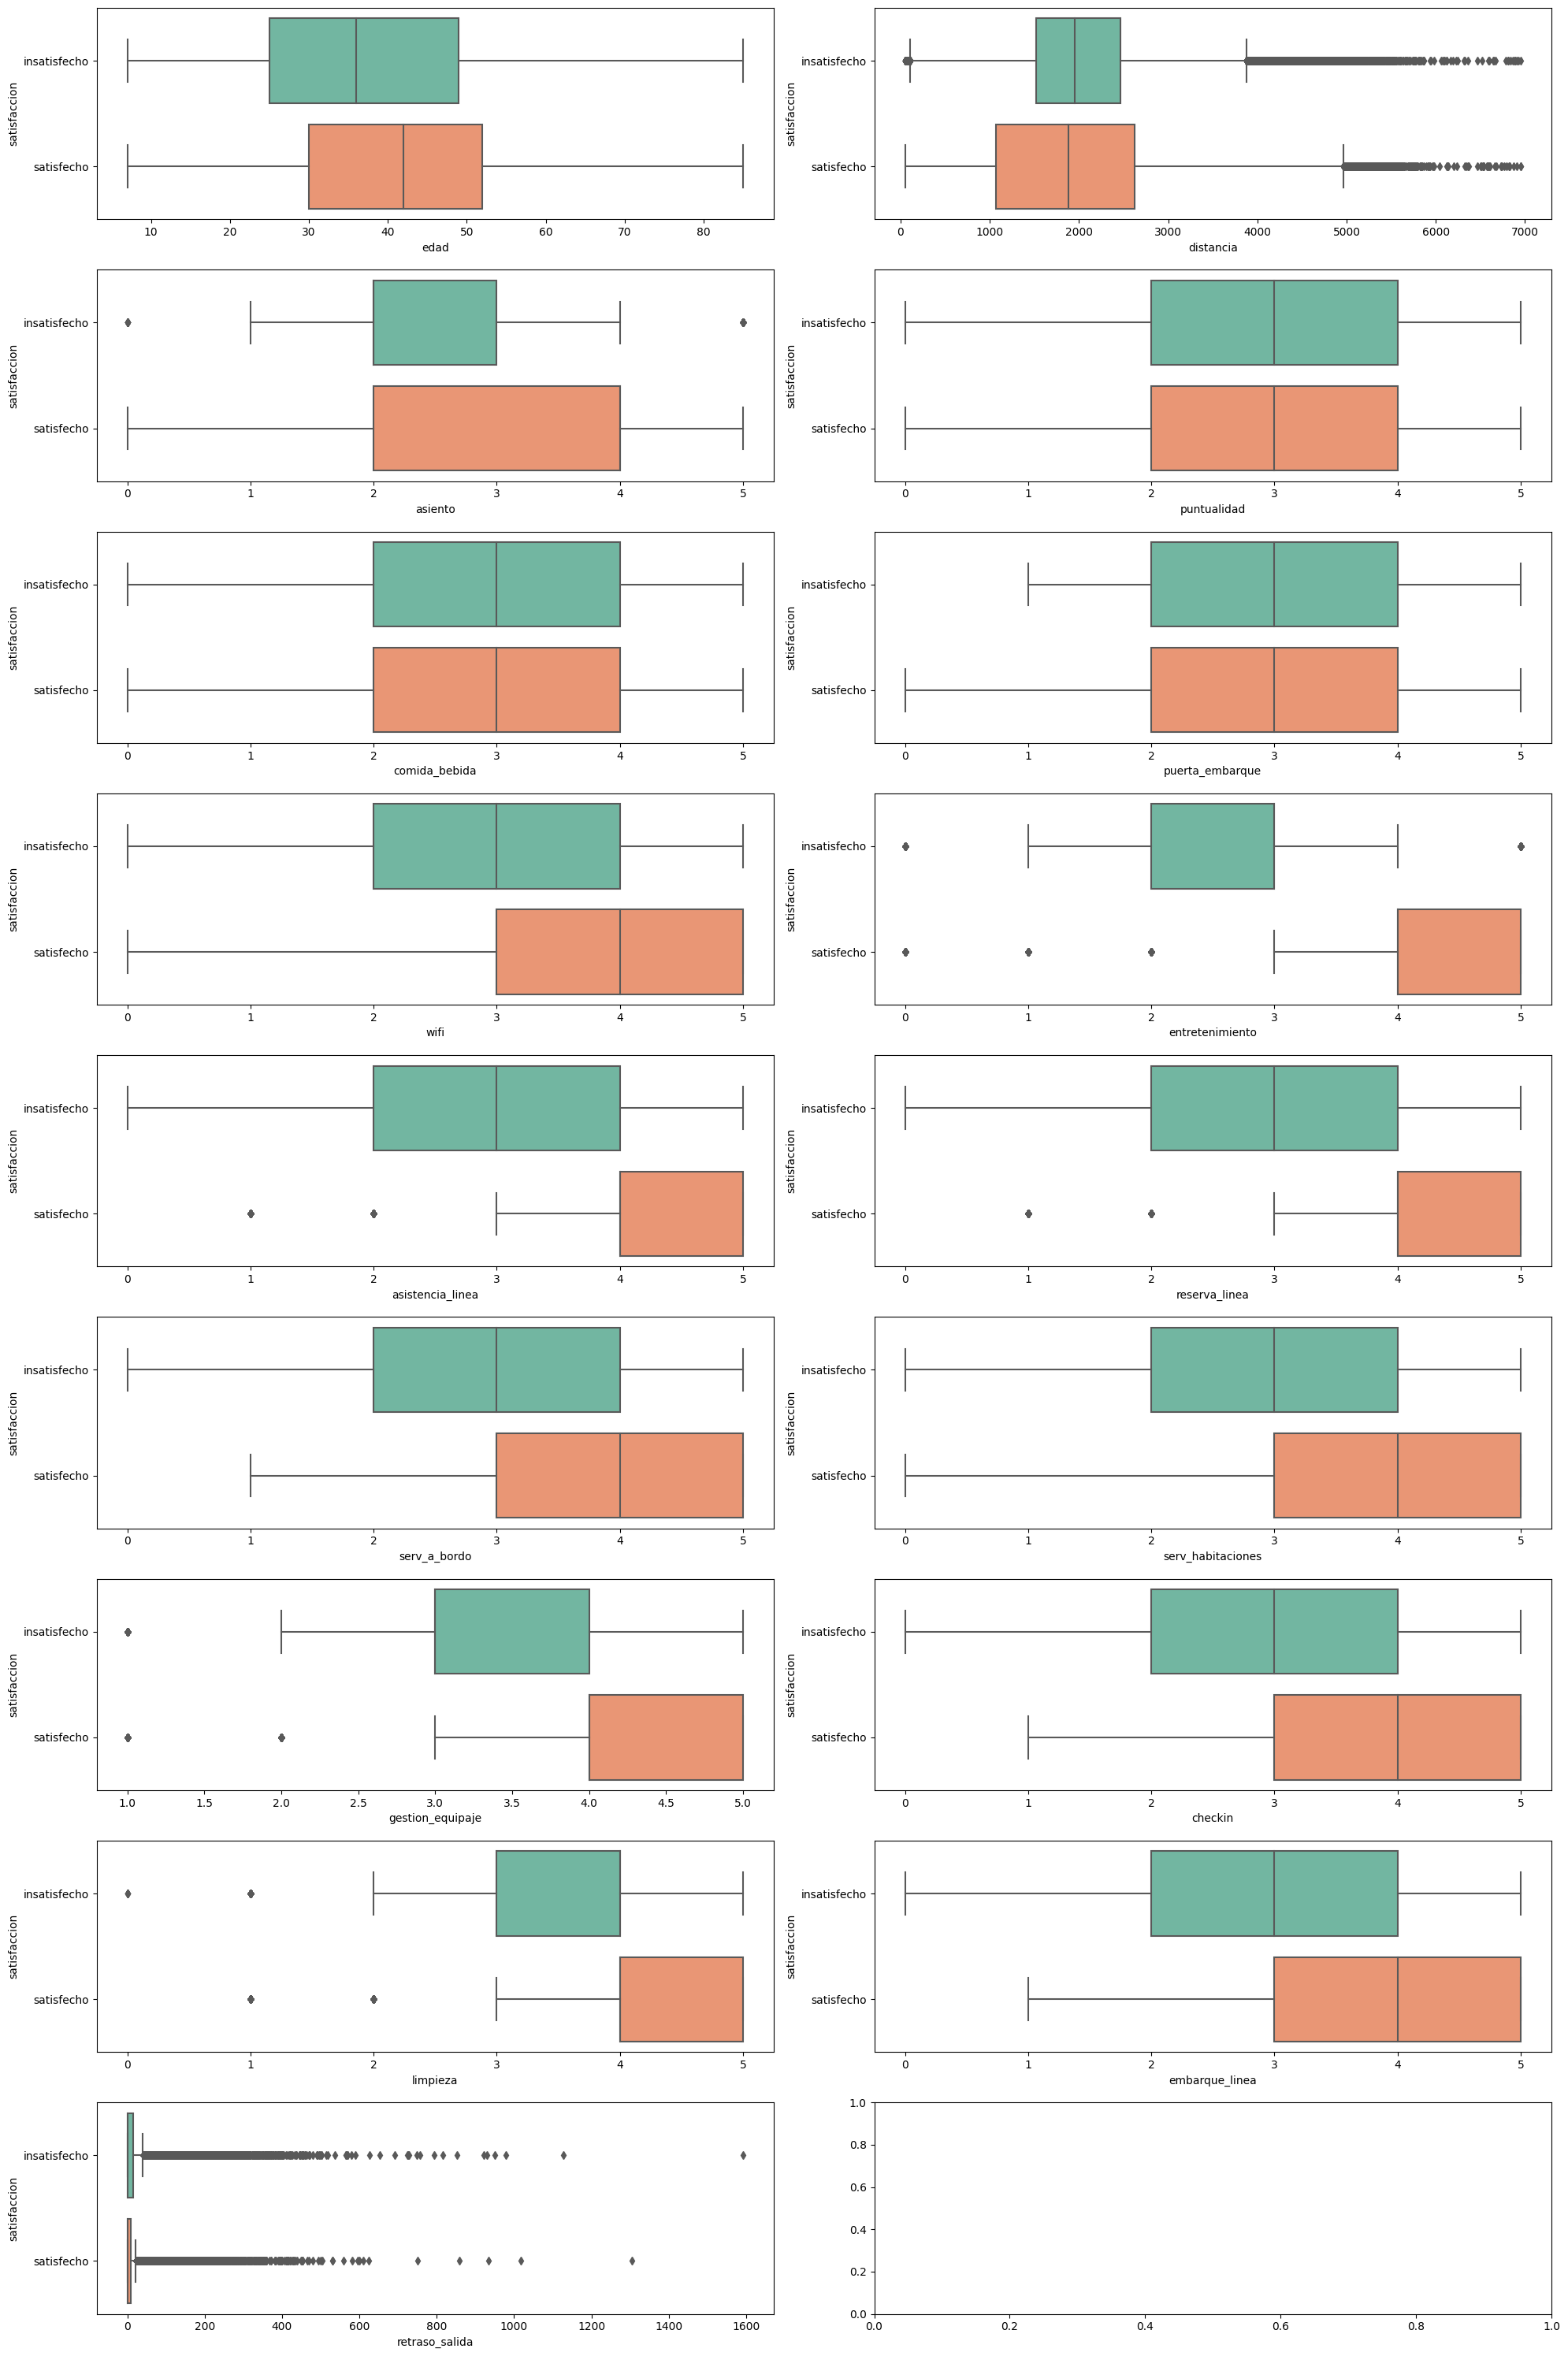

In [30]:
fig.delaxes(axes[-1])

fig, axes = plt.subplots(9, 2, figsize=(20,30))
axes = axes.flat

for indice, columna in enumerate(lista_columnas):
    sns.boxplot(x = df[columna], y = df["satisfaccion"], data = df, ax=axes[indice], palette = qualitative_colors);
plt.tight_layout()
#fig.delaxes(axes[-1])
plt.savefig("../graficas/01_eda_boxplots_preprocesa.png");
plt.show()

In [31]:
df.to_pickle("../data/Invistico_Airline_limpio_outliers_sin_gestionar.pkl")

In [32]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [33]:
ind = detectar_outliers(lista_columnas, df)
print(ind)

{'distancia': [145, 540, 588, 1160, 1161, 1162, 1664, 1750, 2039, 2859, 2862, 3715, 3718, 3722, 4091, 4096, 4768, 4769, 4779, 5528, 5885, 5886, 5889, 7239, 7630, 8675, 8678, 9071, 9073, 9494, 9613, 9614, 9615, 10063, 10921, 11422, 11815, 12861, 12862, 12863, 13490, 13495, 13511, 14658, 14671, 15497, 15962, 16007, 16296, 16386, 16991, 17615, 17624, 18607, 18608, 18609, 18620, 19303, 20102, 20103, 20260, 20346, 20439, 20441, 20442, 20628, 20629, 20630, 21586, 21594, 21607, 22092, 22097, 22111, 22692, 22695, 23001, 23003, 23481, 23485, 23942, 24382, 24997, 25623, 25629, 25655, 26856, 27712, 28057, 28097, 28522, 29894, 29895, 29896, 29898, 29906, 30834, 31462, 31934, 32188, 32369, 32805, 32854, 33326, 33564, 33802, 34157, 34631, 35567, 35570, 35581, 36443, 36549, 36856, 37227, 37232, 38434, 39014, 39605, 39838, 40242, 40769, 41082, 41418, 41558, 41610, 41969, 42703, 43385, 43981, 44264, 45355, 46077, 46368, 46734, 46748, 48041, 48056, 48066, 48530, 48645, 49037, 49042, 49083, 50310, 51557,

In [34]:
#lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 

for k, v in ind.items():
    mediana = df[k].median() 
    for i in v: 
        df.loc[i,k] = mediana 

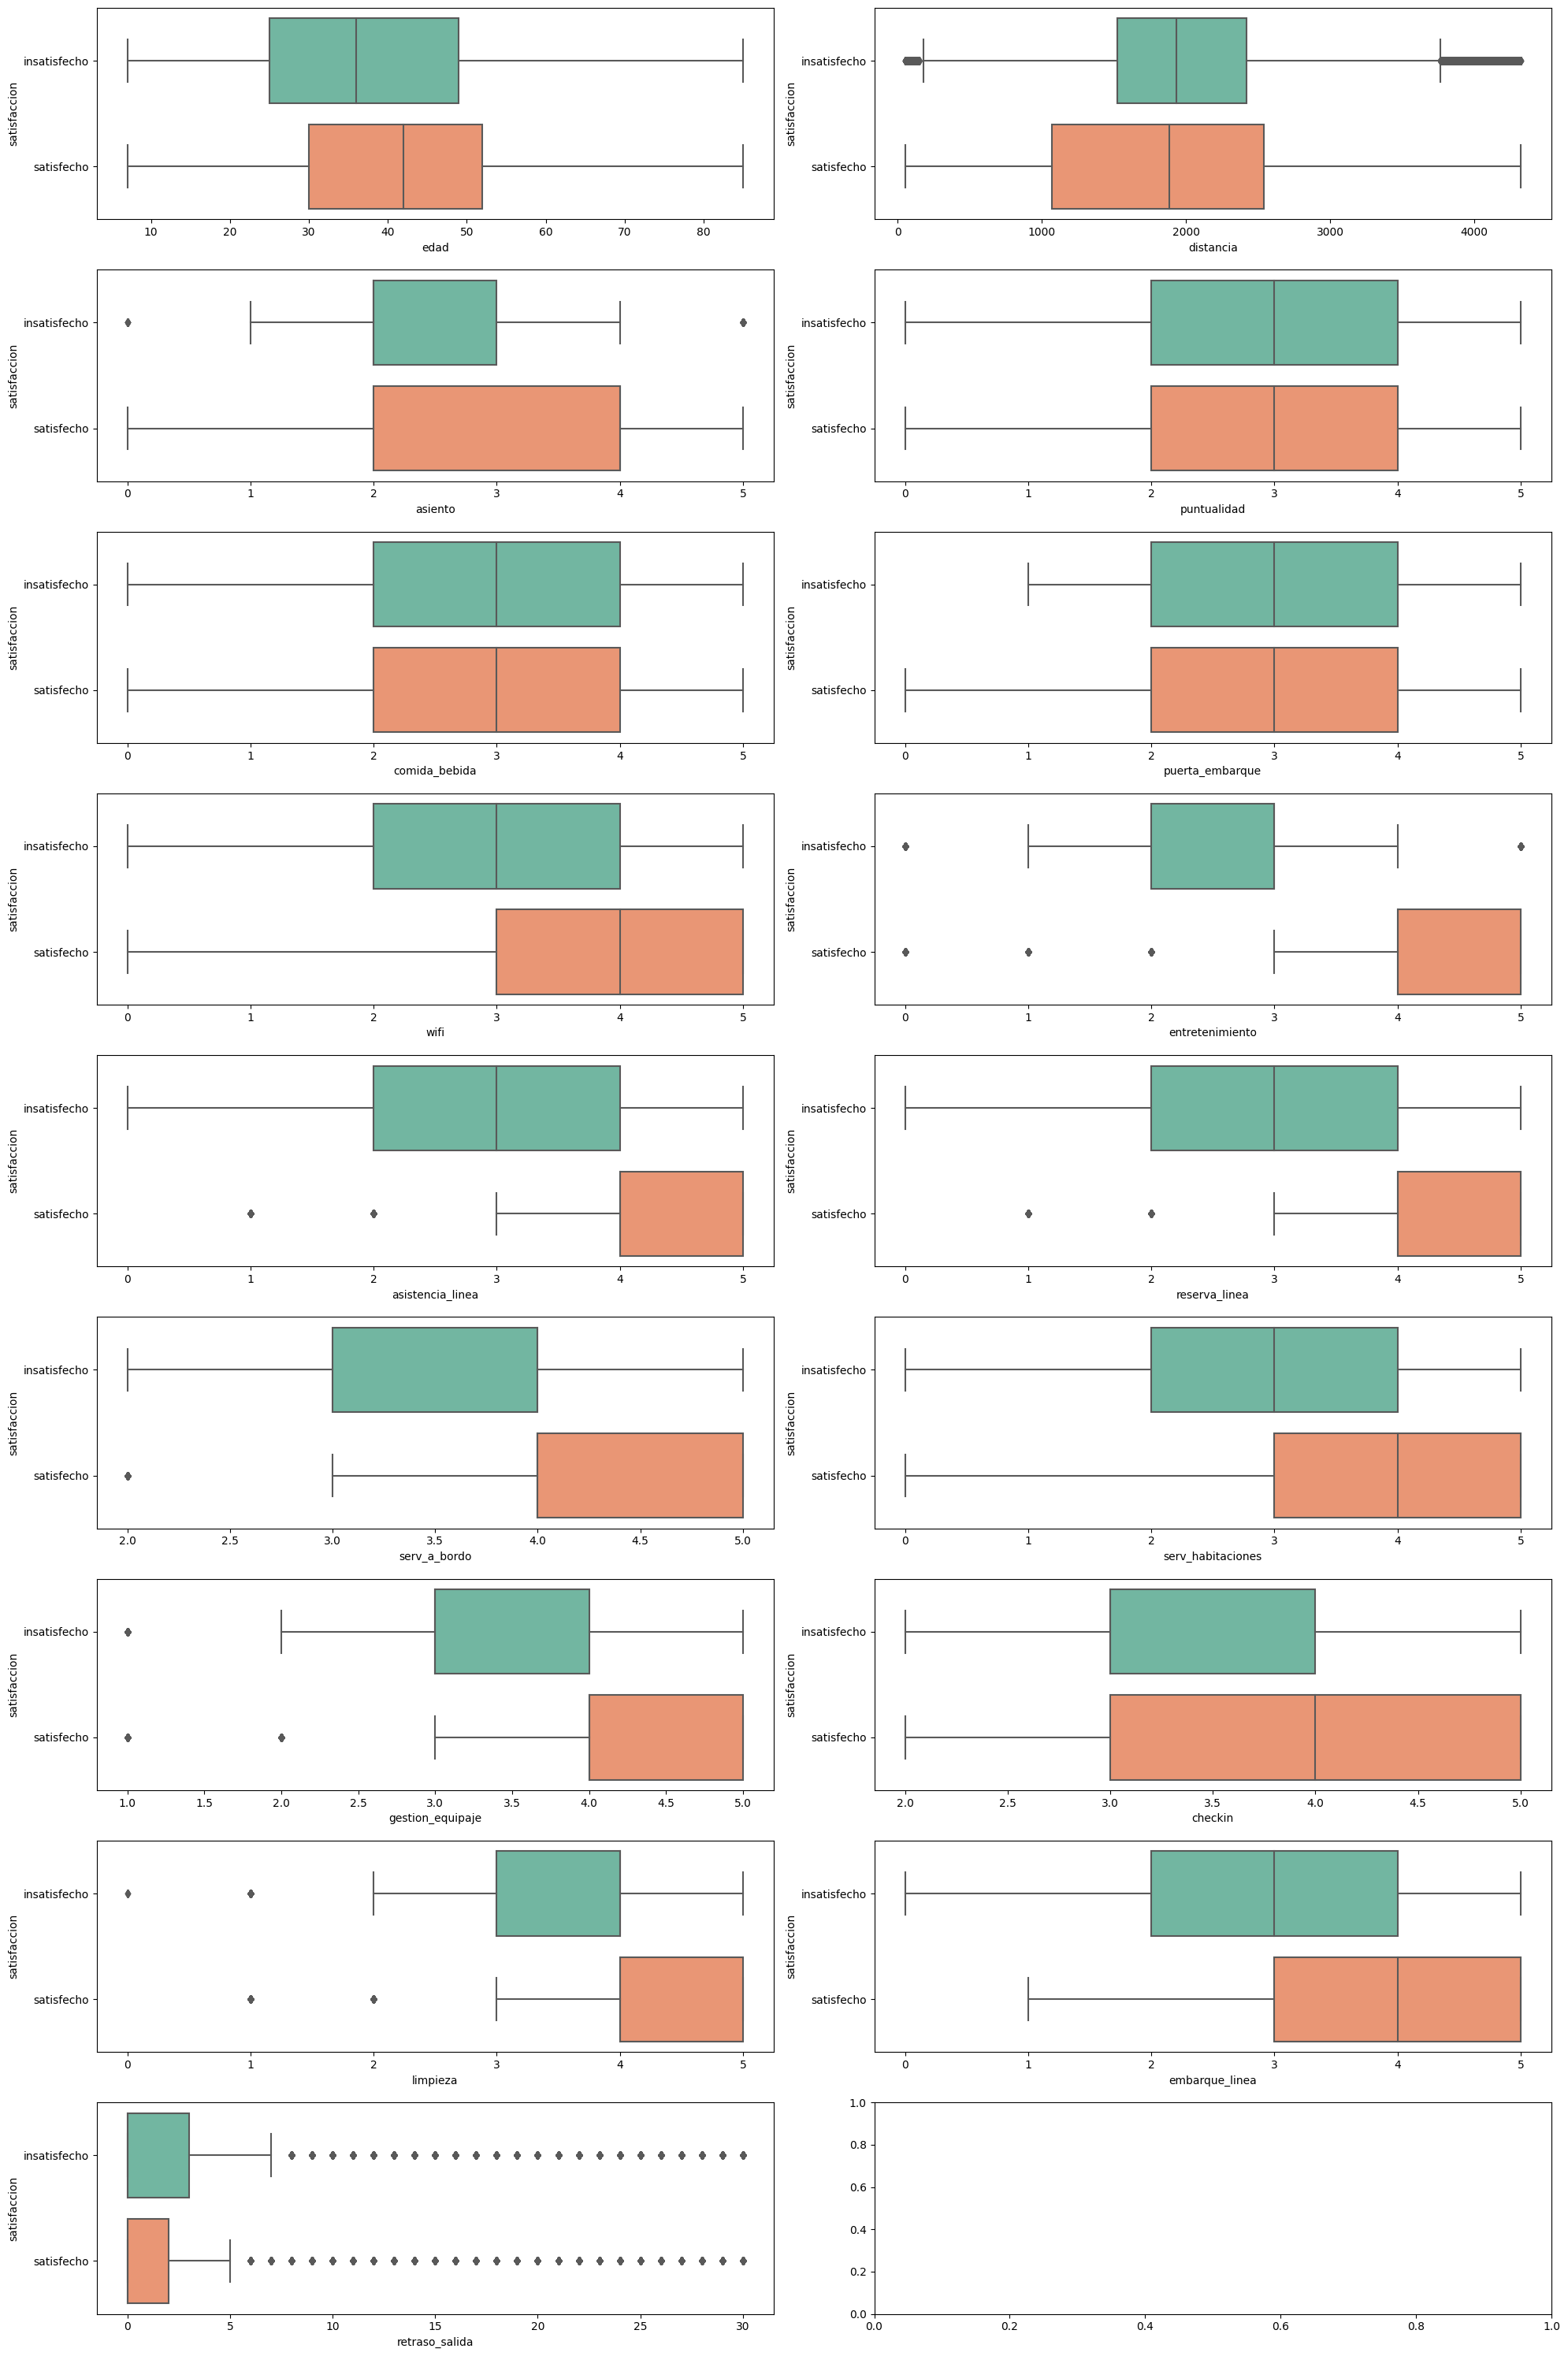

In [35]:
fig.delaxes(axes[-1])

fig, axes = plt.subplots(9, 2, figsize=(20,30))
axes = axes.flat

for indice, columna in enumerate(lista_columnas):
    sns.boxplot(x = df[columna], y = df["satisfaccion"], data = df, ax=axes[indice], palette = qualitative_colors);
plt.tight_layout()
#fig.delaxes(axes[-1])
plt.savefig("../graficas/01_eda_boxplots_outliers_gestionados.png");
plt.show()

In [36]:
df.to_pickle("../data/Invistico_Airline_limpio_outliers_tratados.pkl")